# DSM 1114  
>主題: 【用股市資料進行數據分析】<br>關鍵字: 簡單線性回歸, 股票價格預測、nparray<br>
分享者: 施尚丞

# 簡單線性迴歸模型

## 什麼是簡單線性迴歸模型？

簡單線性回歸是一種統計方法，用來找出兩個變數之間的關係，特別是當一個變數（通常叫做自變數X）改變時，另一個變數（叫做應變數y）會如何跟著變化。

$$ y = \beta_0 + \beta_1 x + \epsilon $$

其中：

$ y $ 是因變數<br>
$ x $ 是自變數<br>
$ \beta_0 $ 是截距<br>
$ \beta_1 $ 是斜率<br>
$ \epsilon $ 是誤差項<br>
這個模型假設自變數和因變數之間存在線性關係，並且誤差項是隨機的且服從常態分佈。

### 怎麼時候會應用簡單線性迴歸模型？
1. 銷售預測：像是根據氣溫預測冰淇淋的銷售量，或根據假期、促銷活動等來預測產品銷售量，以便於制定銷售策略。

2. 房價估算：根據房子的面積預測房價。例如，用房屋的坪數來預測房價，或者根據房齡來估算折舊。

3. 經濟學與財務分析：可以根據一家公司過去的銷售收入變化來預測未來的收入，或根據市場利率的變動來預測股票價格變化。

簡單線性回歸適合用在「只有一個主要影響因素」的情況，可以用來建立初步的預測模型或找出兩個變數的關聯性。

## 舉例 溫度變高，冰淇淋銷量是否也會跟著增加?

In [18]:
pip install numpy matplotlib scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

1. import numpy as np：匯入 numpy 套件並以 np 作為簡稱，numpy 是 Python 中常用的數值計算工具，這裡用於處理數據。
2. import matplotlib.pyplot as plt：匯入 matplotlib.pyplot 並簡稱為 plt，這個套件用於繪圖和資料視覺化。
3. from sklearn.linear_model import LinearRegression：從 scikit-learn 的線性模型中匯入 LinearRegression 類別，這是我們用來建立線性回歸模型的工具。

### 沒有套件?
- 方法一: 打開命令提示字元，後輸入 pip install numpy matplotlib scikit-learn(你要的套件)
- 方法二: 在程式碼中輸入!pip install numpy matplotlib scikit-learn


In [20]:
#  20 筆溫度數據（單位：攝氏）
temperature = np.array([[26], [28], [30], [31], [33], [35], [37], [38], [40], [41], 
                        [43], [44], [46], [47], [48], [49], [50], [51], [52], [53]])

#  20 筆冰淇淋銷售量數據（單位：銷售數量）
ice_cream_sales = np.array([180, 190, 210, 220, 240, 250, 270, 280, 290, 300,
                            320, 330, 350, 360, 370, 380, 390, 400, 410, 420])

np.array 是 NumPy 提供的資料結構，用來處理多維度的數據，簡單來說它是一種「多維度陣列」。

### 為什麼用 np.array？
在數據分析、科學計算和機器學習中，我們常需要處理大量數據，np.array 能幫助我們更快速、有效率地處理這些數據。它能輕鬆地表示一維（像列表）、二維（像表格）甚至更高維度的數據，同時具備快速的計算速度。
### 為何比列表 (list) 快？
np.array 儲存的數據是連續的記憶體空間，因此進行計算時更高效，也提供許多內建函數來快速進行數學運算，比起 Python 的列表操作速度快很多。


In [21]:
# 導入必要的庫
import numpy as np
from sklearn.linear_model import LinearRegression  # 修正：導入 LinearRegression

# 建立線性回歸模型
model = LinearRegression()
# 訓練模型
model.fit(temperature,ice_cream_sales)



LinearRegression()



1. **$y$ 是因變數**：也就是我們想要預測或解釋的結果。在冰淇淋的例子中，$y$ 就是「冰淇淋的銷售量」。

2. **$x$ 是自變數**：這是影響結果的變數，換句話說，就是我們用來預測因變數的數據。在這裡，$x$ 是「溫度」。

3. **$\beta_0$ 是截距**：當溫度 ($x$) 是 0 度時，冰淇淋的銷售量會是多少。這個數值幫助我們確定回歸直線在 y 軸上的起點位置。

4. **$\beta_1$ 是斜率**：這個值告訴我們每當溫度增加 1 度，冰淇淋銷售量會增減多少。斜率越大，表示自變數對因變數的影響越大。

5. **$\epsilon$ 是誤差項**：在現實中，數據點不會完美落在直線上，因此誤差項 $\epsilon$ 表示每個數據點和直線之間的距離。這些誤差是隨機的，代表了「沒被模型解釋到」的因素。誤差項的假設是，它們服從常態分布（也就是鐘型曲線），這讓我們的回歸分析更加準確。

## 套件中的fit代表什麼意思？
每個library基本上都會有官方的文件可以參考，學習數據分析的時候會是比起GPT更準確的學習方式。

從文件可以看到fit的意思是擬合，也就是用來訓練模型的意思。

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html


In [22]:
# 取得模型的斜率 (m) 和截距 (b)
m = model.coef_[0]
b = model.intercept_
print(f"斜率 (m): {m}")
print(f"截距 (b): {b}")

斜率 (m): 8.956179938855728
截距 (b): -60.09899548697041


使用 ``predict()`` 來對輸入資料進行預測

In [7]:
# 預測
predicted_sales = model.predict(temperature)

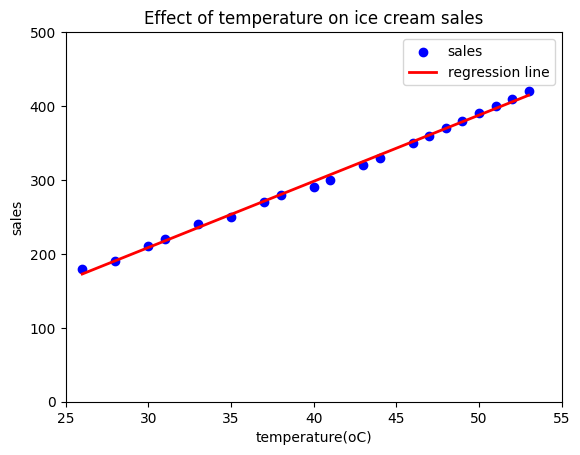

In [23]:
# 畫出資料點和回歸直線
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
#調整X軸的範圍
#調整Y軸的標籤

plt.scatter(temperature, ice_cream_sales, color='blue', label='sales')
plt.plot(temperature, predicted_sales, color='red', linewidth=2, label='regression line')
plt.xlabel('temperature(oC)')
plt.ylabel('sales')
plt.title('Effect of temperature on ice cream sales')
plt.legend() # 顯示圖例
plt.ylim(0, 500)
plt.xlim(25, 55)
plt.show()

### 解釋結果:
- 斜率約為 8.96，表示當溫度上升 1 度，冰淇淋銷售量會增加大約 8.96 單位。
- 截距約為 -60.1，這雖然是一個負值，並不符合實際情況，不多做解讀。
- 透過模型預測，溫度與冰淇淋銷售量之間的正向線性關係。

## 回歸正題: 如何運用現有資料庫進行股票價格預測?


使用Yahoo的股價資料進行股價預測，用每一天的收盤價來預測隔一天的收盤價。

導入套件:

In [12]:
pip install yfinance 



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 


### a) 準備資料集

In [17]:
import yfinance as yf
from datetime import datetime, timedelta

# 計算日期範圍
end_date = datetime.today().strftime("%Y-%m-%d")
start_date = (datetime.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# 下載近1年的數據
data = yf.download("AAPL", start=start_date, end=end_date, interval="1d")

# 檢查數據是否為空
if data.empty:
    print("下載失敗，請檢查輸入參數或網路連接。")
else:
    print(data.head())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-11-29  188.446793  189.369995  192.089996  188.970001  190.899994   
2023-11-30  189.023972  189.949997  190.320007  188.190002  189.839996   
2023-12-01  190.307693  191.240005  191.559998  189.229996  190.330002   
2023-12-04  188.506500  189.429993  190.050003  187.449997  189.979996   
2023-12-05  192.477051  193.419998  194.399994  190.179993  190.210007   

Price         Volume  
Ticker          AAPL  
Date                  
2023-11-29  43014200  
2023-11-30  48794400  
2023-12-01  45679300  
2023-12-04  43389500  
2023-12-05  66628400  


In [18]:
#查看數據的前幾筆
print(data.head())

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-11-29  188.446793  189.369995  192.089996  188.970001  190.899994   
2023-11-30  189.023972  189.949997  190.320007  188.190002  189.839996   
2023-12-01  190.307693  191.240005  191.559998  189.229996  190.330002   
2023-12-04  188.506500  189.429993  190.050003  187.449997  189.979996   
2023-12-05  192.477051  193.419998  194.399994  190.179993  190.210007   

Price         Volume  
Ticker          AAPL  
Date                  
2023-11-29  43014200  
2023-11-30  48794400  
2023-12-01  45679300  
2023-12-04  43389500  
2023-12-05  66628400  


### b)資料前處理

In [19]:
# 準備資料，使用前一天的收盤價預測隔一天的收盤價
data['Next_Close'] = data['Close'].shift(-1)
data.dropna()# 移除空值的列

Price,Adj Close,Close,High,Low,Open,Volume,Next_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2023-11-29,188.446793,189.369995,192.089996,188.970001,190.899994,43014200,189.949997
2023-11-30,189.023972,189.949997,190.320007,188.190002,189.839996,48794400,191.240005
2023-12-01,190.307693,191.240005,191.559998,189.229996,190.330002,45679300,189.429993
2023-12-04,188.506500,189.429993,190.050003,187.449997,189.979996,43389500,193.419998
2023-12-05,192.477051,193.419998,194.399994,190.179993,190.210007,66628400,192.320007
...,...,...,...,...,...,...,...
2024-11-20,229.000000,229.000000,229.929993,225.889999,228.059998,35169600,228.520004
2024-11-21,228.520004,228.520004,230.160004,225.710007,228.880005,42108300,229.869995


### c) 建立簡單線性回歸模型

In [20]:
# 將數據分為特徵 (X) 和標籤 (y)
X = data[['Close']]  # 當天的收盤價
y = data['Next_Close']  # 隔天的收盤價

# 拆分訓練集和測試集（80%訓練，20%測試）
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 建立線性回歸模型並進行訓練
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:

# 預測測試集
y_pred = model.predict(X_test)

### d) 顯示結果

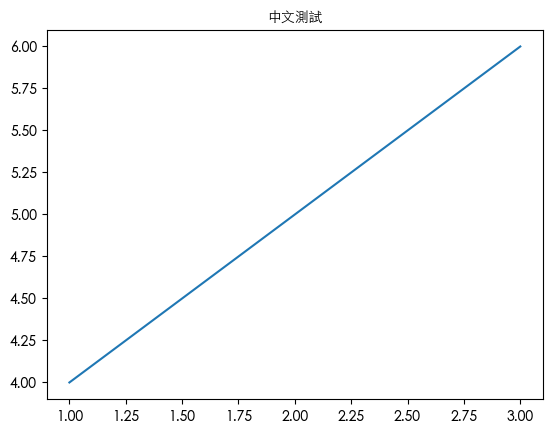

In [28]:
from matplotlib import rcParams
from matplotlib import font_manager

# 指定字體路徑
font_path = '/System/Library/Fonts/STHeiti Light.ttc'  # 替換為正確的字體路徑
font = font_manager.FontProperties(fname=font_path)

# 設置 Matplotlib 字體
rcParams['font.sans-serif'] = font.get_name()
rcParams['axes.unicode_minus'] = False

# 測試繪圖
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("中文測試", fontproperties=font)
plt.show()

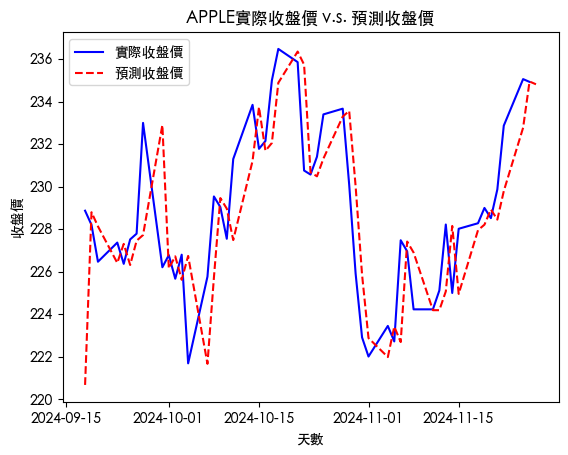

In [31]:
from matplotlib import rcParams
from matplotlib import font_manager

# 指定字體路徑
font_path = '/System/Library/Fonts/STHeiti Light.ttc'  # 替換為正確的字體路徑
font = font_manager.FontProperties(fname=font_path)

# 設置 Matplotlib 字體
rcParams['font.sans-serif'] = font.get_name()
rcParams['axes.unicode_minus'] = False

# 將預測結果和實際值放入 DataFrame，方便觀察
result_df = pd.DataFrame({'Actual_Close': y_test, 'Predicted_Close': y_pred})

# 視覺化預測結果與實際值
plt.plot(result_df.index, result_df['Actual_Close'], label='實際收盤價', color='blue')
plt.plot(result_df.index, result_df['Predicted_Close'], label='預測收盤價', color='red', linestyle='--')
plt.xlabel('天數')
plt.ylabel('收盤價')
plt.title('APPLE實際收盤價 v.s. 預測收盤價')
plt.legend()
plt.show()

#### 顯示字體
```
from matplotlib import rcParams
from matplotlib import font_manager

# 指定字體路徑
font_path = '/System/Library/Fonts/STHeiti Light.ttc'  # 替換為正確的字體路徑
font = font_manager.FontProperties(fname=font_path)

# 設置 Matplotlib 字體
rcParams['font.sans-serif'] = font.get_name()
rcParams['axes.unicode_minus'] = False
```

### e) 滾動預測未來股價
透過連續使用預測值來預測下一天的收盤價，以此類推，進行未來 40 天的滾動預測。

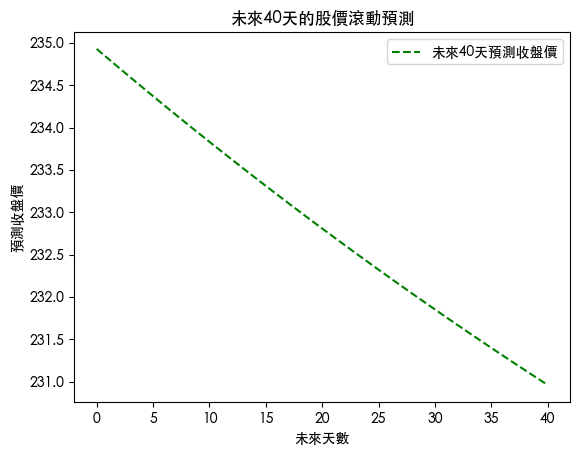

In [33]:
# 使用測試集最後一日的預測結果作為初始值
# Instead of using iloc[-1] which may contain NaN, try using a valid index
# Assuming y_test is a pandas Series with a DatetimeIndex, we can use the last valid index
last_close = y_test[y_test.last_valid_index()]
predicted_prices = [last_close]

# 進行 40 天的滾動預測
for _ in range(40): #_代表我不關心變數的值，只是要執行40次
    next_price = model.predict([[predicted_prices[-1]]])[0]
    predicted_prices.append(next_price)

# 畫出滾動預測的股價走勢
plt.plot(predicted_prices, label='未來40天預測收盤價', linestyle='--', color='green')
plt.xlabel('未來天數')
plt.ylabel('預測收盤價')
plt.title('未來40天的股價滾動預測')
plt.legend()
plt.show()

---

### 補充1: 可視化訓練集與測試集的預測

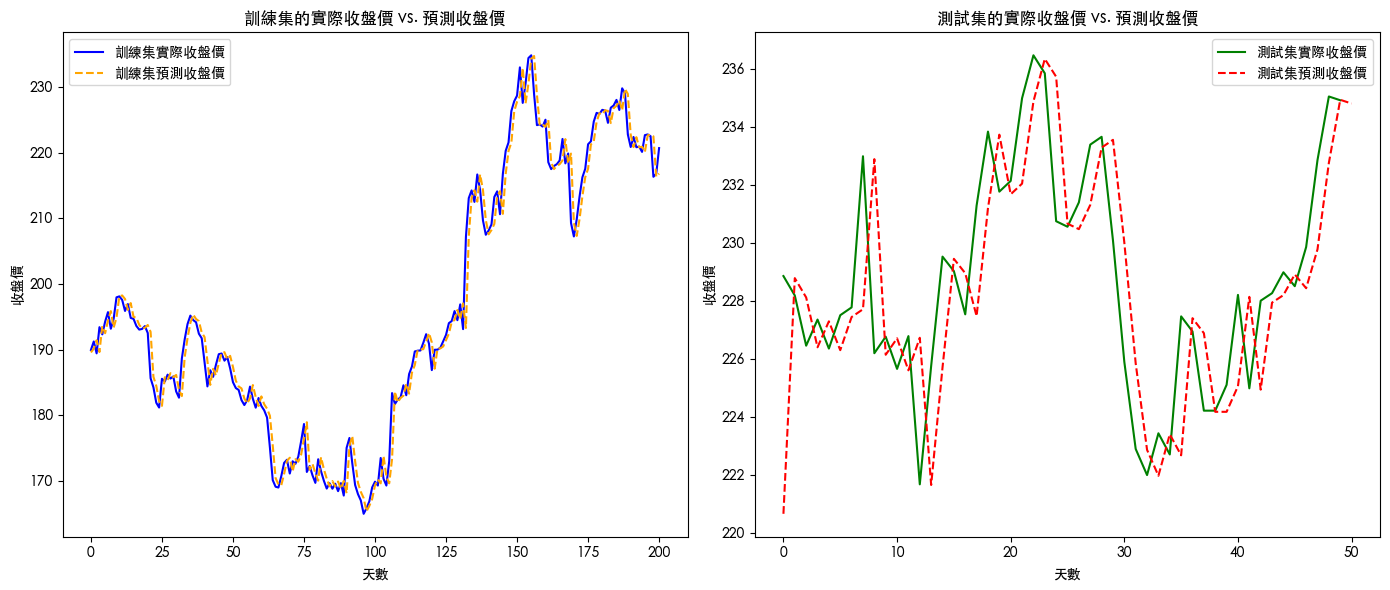

In [34]:
# 訓練集預測
y_train_pred = model.predict(X_train)

# 創建 1 行 2 列的子圖
plt.figure(figsize=(14, 6))

# 子圖 1：訓練集的實際收盤價與預測收盤價
plt.subplot(1, 2, 1)
plt.plot(y_train.values, label='訓練集實際收盤價', color='blue')
plt.plot(y_train_pred, label='訓練集預測收盤價', linestyle='--', color='orange')
plt.xlabel("天數")
plt.ylabel("收盤價")
plt.title("訓練集的實際收盤價 vs. 預測收盤價")
plt.legend()

# 子圖 2：測試集的實際收盤價與預測收盤價
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='測試集實際收盤價', color='green')
plt.plot(y_pred, label='測試集預測收盤價', linestyle='--', color='red')
plt.xlabel("天數")
plt.ylabel("收盤價")
plt.title("測試集的實際收盤價 vs. 預測收盤價")
plt.legend()

# 顯示所有子圖
plt.tight_layout()
plt.show()



### 補充2: 殘差（實際值減預測值）分析可以用來檢查模型的擬合效果。

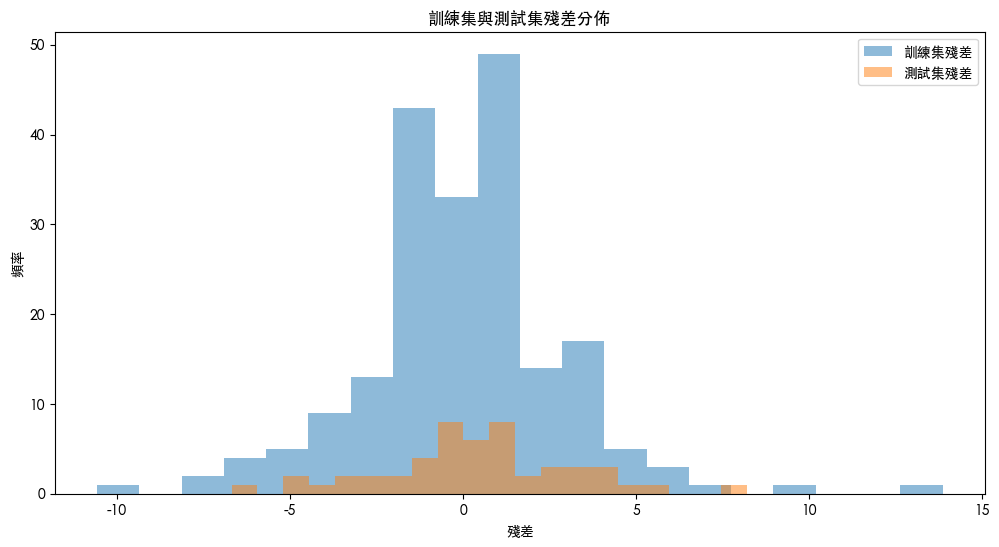

In [41]:

from matplotlib import rcParams
from matplotlib import font_manager

# 指定字體路徑
font_path = '/System/Library/Fonts/STHeiti Light.ttc'  # 替換為正確的字體路徑
font = font_manager.FontProperties(fname=font_path)

# 設置 Matplotlib 字體
rcParams['font.sans-serif'] = font.get_name()
rcParams['axes.unicode_minus'] = False

# 計算殘差
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_pred

# 畫出殘差分佈
plt.figure(figsize=(12, 6))
plt.hist(train_residuals, bins=20, alpha=0.5, label='訓練集殘差')
plt.hist(test_residuals, bins=20, alpha=0.5, label='測試集殘差')
plt.xlabel("殘差")
plt.ylabel("頻率")
plt.title("訓練集與測試集殘差分佈")
plt.legend()
plt.show()


#### 殘差的定義：

- 殘差是實際值與預測值之間的差異，計算方式為 殘差 = 實際值 - 預測值。
- 當殘差接近 0 時，表示模型預測值接近實際值；殘差越大（無論正或負），代表模型的預測誤差越大。

### 補充3: 擬合、欠擬合(underfitting)和過擬合(overfitting)的概念
1. 擬合（Fitting）：模型的擬合是指模型根據訓練數據學習到的能力。我們希望模型能夠準確學習數據的模式，同時能夠泛化到新數據。理想的擬合模型應該在訓練集和測試集上表現良好。

2. 欠擬合（Underfitting）：欠擬合是指模型過於簡單，無法捕捉到數據的真實模式。在這種情況下，模型在訓練集和測試集上都表現不佳。通常是因為模型的複雜度不夠，無法學習數據中的複雜關係。

3. 過擬合（Overfitting）：過擬合是指模型過於複雜，過度擬合訓練數據，包括訓練數據中的噪音。在這種情況下，模型在訓練集上表現良好，但在測試集上表現不佳，無法泛化到新數據。

參考資料:

https://medium.com/%E6%89%8B%E5%AF%AB%E7%AD%86%E8%A8%98/%E4%BD%BF%E7%94%A8-tensorflow-%E4%BA%86%E8%A7%A3%E9%81%8E%E6%93%AC%E5%90%88%E8%88%87%E6%AC%A0%E6%93%AC%E5%90%88-a75a26cc87e0
https://ithelp.ithome.com.tw/m/articles/10220729
